In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_csv(input_csv, label):
    # === Parameters ===
    spy_threshold = 0.715

    # === Read CSV ===
    df = pd.read_csv(input_csv)

    df['true_label'] = label

    df.loc[df['label'] == 'TruePositive', 'true_label'] = 1
    df.loc[df['label'] == 'TrueNegative', 'true_label'] = 0

    # === Predicted labels using spy threshold ===
    df['predicted_label'] = (df['average_score'] > spy_threshold).astype(int)

    # === Confusion Matrix ===
    cm = confusion_matrix(df['true_label'], df['predicted_label'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(df['true_label'], df['average_score'])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

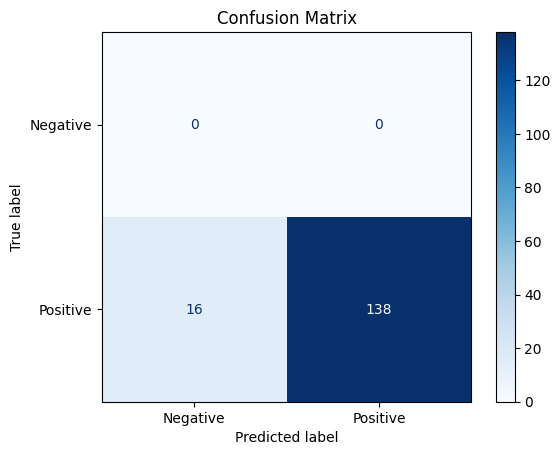

/home/alexhernandez/miniconda3/envs/cpp-ml/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


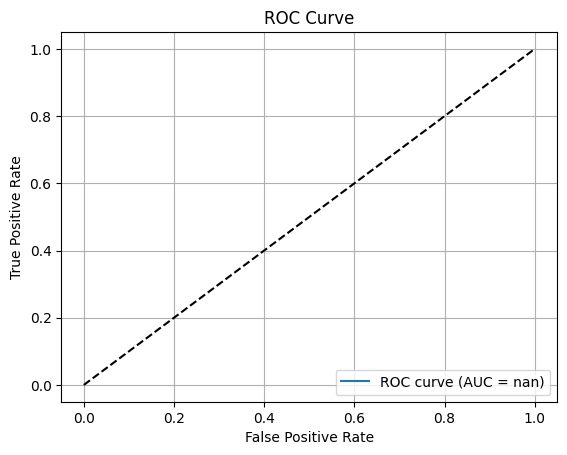

In [8]:
input_csv = "test_positive_labels.csv"  
evaluate_csv(input_csv, 1)

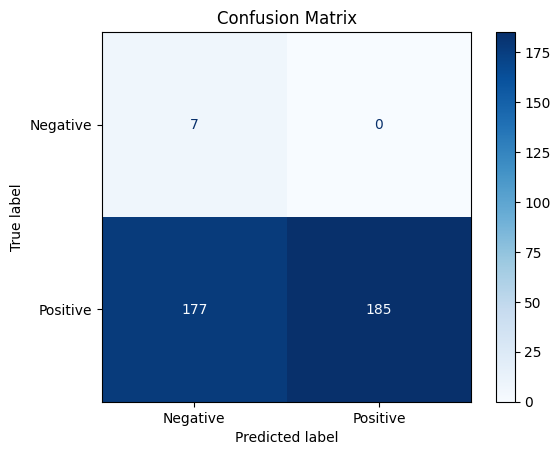

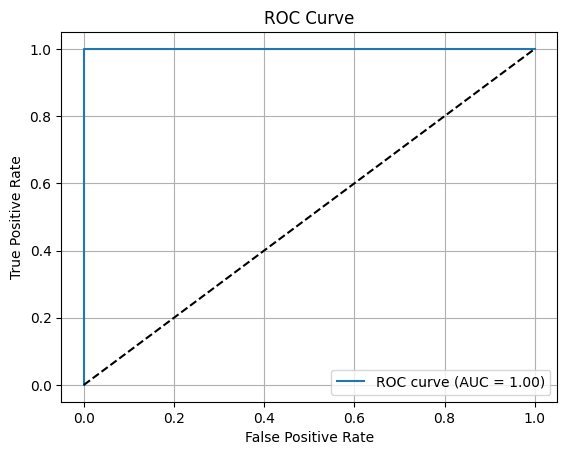

In [9]:
input_csv = "test_positive_unlabeled_labels.csv"  
evaluate_csv(input_csv, 1)

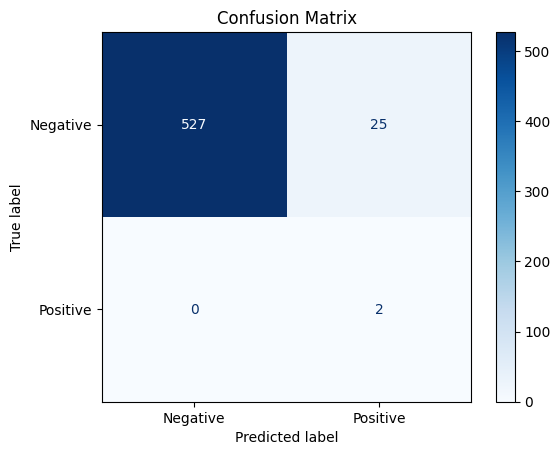

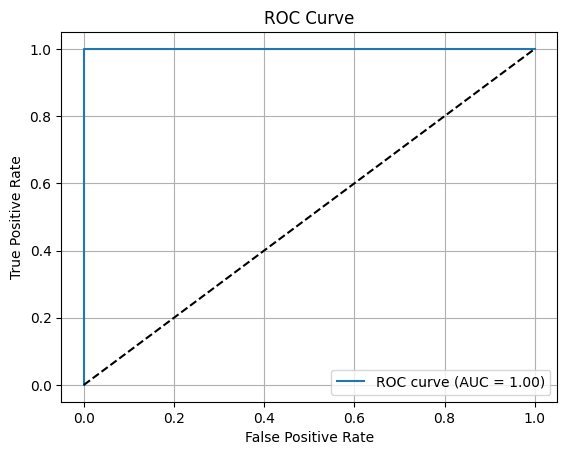

In [10]:
input_csv = "test_unlabeled_labels.csv"  
evaluate_csv(input_csv, 0)